# Retail Inventory Optimization

In [1]:
# Import Data from SQL

import pandas as pd
from sqlalchemy import create_engine

# Connection parameters
server = 'DESKTOP-20VNCFV\\SQLEXPRESS'
database = 'Retail_Inventory'
# No need for username and password with integrated Windows authentication

# Create a connection string with integrated Windows authentication
conn_str = f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'

# Create SQLAlchemy engine
engine = create_engine(conn_str)

# Example query
sql_query = """
    SELECT
    ib.InventoryId,
    ib.Store,
    ib.Brand,
    ib.Description,
    COALESCE(ib.Size, ie.Size) AS Size,  -- Use COALESCE to handle null values
    ib.OnHand AS InventoryBegin,
    ie.OnHand AS InventoryEnd,
    s.SalesQuantity AS Sales,
    s.SalesDate
FROM 
    Inventory_Begin ib
JOIN 
    Inventory_End ie ON ib.InventoryId = ie.InventoryId
JOIN 
    Sales s ON ib.InventoryId = s.InventoryId
WHERE ib.Size IS NOT NULL OR ie.Size IS NOT NULL ;
"""

# Use pd.read_sql_query() to execute the SQL query and load data into a Pandas DataFrame
df = pd.read_sql_query(sql_query, engine)

# Display the DataFrame
print(df)

                 InventoryId  Store  Brand                   Description  \
0       1_HARDERSFIELD_10421      1  10421          Barefoot Moscato Cal   
1       1_HARDERSFIELD_10421      1  10421          Barefoot Moscato Cal   
2       1_HARDERSFIELD_10421      1  10421          Barefoot Moscato Cal   
3       1_HARDERSFIELD_10421      1  10421          Barefoot Moscato Cal   
4       1_HARDERSFIELD_10421      1  10421          Barefoot Moscato Cal   
...                      ...    ...    ...                           ...   
251373   19_WINTERVALE_23595     19  23595          Almaden Burgundy B/B   
251374   19_WINTERVALE_28889     19  28889     Peter Vella Chard Cal B/B   
251375   19_WINTERVALE_28889     19  28889     Peter Vella Chard Cal B/B   
251376   19_WINTERVALE_33683     19  33683  R Mondavi Private Slct Chard   
251377   19_WINTERVALE_33683     19  33683  R Mondavi Private Slct Chard   

          Size  InventoryBegin  InventoryEnd  Sales   SalesDate  
0       2000mL       

In [2]:
# Step 1: Data Exploration
# Display first few rows of the DataFrame


print(df.head())  
 

            InventoryId  Store  Brand           Description    Size  \
0  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000mL   
1  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000mL   
2  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000mL   
3  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000mL   
4  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000mL   

   InventoryBegin  InventoryEnd  Sales   SalesDate  
0               6            83      1  2016-01-03  
1               6            83      1  2016-01-07  
2               6            83      2  2016-01-09  
3               6            83      2  2016-01-10  
4               6            83      1  2016-01-13  


In [3]:
# Get information about the DataFrame


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251378 entries, 0 to 251377
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   InventoryId     251378 non-null  object
 1   Store           251378 non-null  int64 
 2   Brand           251378 non-null  int64 
 3   Description     251378 non-null  object
 4   Size            251378 non-null  object
 5   InventoryBegin  251378 non-null  int64 
 6   InventoryEnd    251378 non-null  int64 
 7   Sales           251378 non-null  int64 
 8   SalesDate       251378 non-null  object
dtypes: int64(5), object(4)
memory usage: 17.3+ MB
None


# Data Cleaning done with SQL

In [4]:
# Remove "ml" from the Size column in the original DataFrame
df['Size'] = df['Size'].str.extract('(\d+)').astype(int)
print(df.head()) 

            InventoryId  Store  Brand           Description  Size  \
0  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000   
1  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000   
2  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000   
3  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000   
4  1_HARDERSFIELD_10421      1  10421  Barefoot Moscato Cal  2000   

   InventoryBegin  InventoryEnd  Sales   SalesDate  
0               6            83      1  2016-01-03  
1               6            83      1  2016-01-07  
2               6            83      2  2016-01-09  
3               6            83      2  2016-01-10  
4               6            83      1  2016-01-13  


In [5]:
#Checking missing values
df.isna().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
InventoryBegin    0
InventoryEnd      0
Sales             0
SalesDate         0
dtype: int64

In [6]:
df.describe()

,Store,Brand,Size,InventoryBegin,InventoryEnd,Sales
count,251378.000000,251378.000000,251378.000000,251378.000000,251378.000000,251378.000000
mean,38.446292,10372.147280,2193.524417,42.292384,46.716025,2.314260
std,23.925587,11597.907715,682.802104,66.706798,77.555078,3.223364
min,1.000000,159.000000,147.000000,0.000000,0.000000,1.000000
25%,15.000000,3485.000000,2000.000000,11.000000,11.000000,1.000000
50%,38.000000,5103.000000,2000.000000,20.000000,21.000000,1.000000
75%,60.000000,8680.000000,2000.000000,45.000000,49.000000,2.000000
max,79.000000,47027.000000,18000.000000,930.000000,1273.000000,202.000000


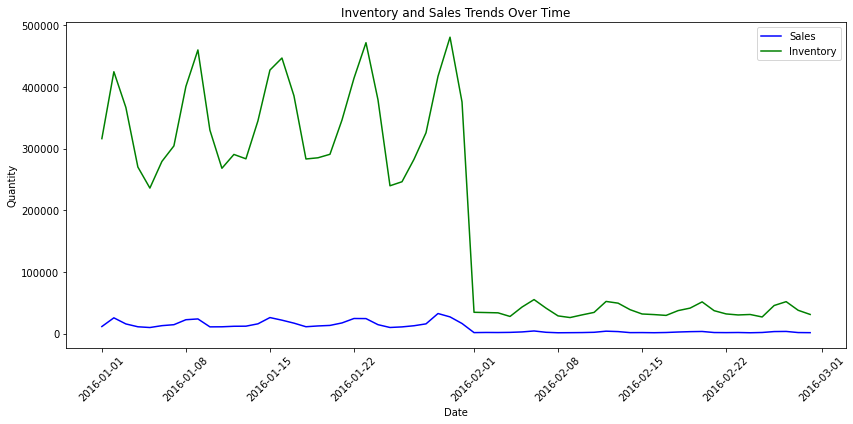

In [27]:
# Data visualization 
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'SalesDate' to datetime format
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

# Group by 'SalesDate' and calculate sum of 'Sales' and 'InventoryEnd' for each date
daily_data = df.groupby('SalesDate').agg({'Sales': 'sum', 'InventoryEnd': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plot Sales trend
plt.plot(daily_data['SalesDate'], daily_data['Sales'], label='Sales', color='blue')

# Plot Inventory trend
plt.plot(daily_data['SalesDate'], daily_data['InventoryEnd'], label='Inventory', color='green')

# Labeling and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Inventory and Sales Trends Over Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'SalesDate' to datetime format
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

# Feature Engineering
df['InventoryChange'] = df['InventoryEnd'] - df['InventoryBegin']
df['SalesRate'] = df['Sales'] / (df['SalesDate'].max() - df['SalesDate'].min()).days
df['DayOfWeek'] = df['SalesDate'].dt.dayofweek
df['Month'] = df['SalesDate'].dt.month

In [9]:
# Define optimal range and thresholds
optimal_range = (50, 100)  # Example: optimal inventory range
threshold_above = 105  # Example: upper threshold for excess inventory
threshold_below = 10  # Example: lower threshold for low inventory


In [10]:
# Create alert label based on stock levels
df['Alert'] = pd.cut(df['InventoryEnd'], 
                      bins=[-float('inf'), threshold_below, optimal_range[0], optimal_range[1], threshold_above, float('inf')],
                      labels=['Low Inventory', 'Below Optimal Inventory', 'Optimal Inventory', 'Above Optimal Inventory', 'Excess Inventory'])


In [11]:
from sklearn.preprocessing import LabelEncoder

# Drop columns with non-numeric values
X = df.drop(['InventoryEnd', 'Alert', 'SalesDate'], axis=1)

# Encode categorical variables if any
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])


# Split data into features (X) and target (y)
y = df['InventoryEnd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.0056657251969130604
Root Mean Squared Error (RMSE): 0.18492983339928795
R-squared (R2): 0.9999941563068776


Insight into which features are most important for the model's predictions, helping to understand the model's behavior and potentially informing feature selection.

In [22]:
# Get feature importances
feature_importances = model.feature_importances_

# Get the names of features from the original DataFrame
feature_names = future_data.columns

# Combine feature names with their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names in the order of importance
sorted_feature_names = [feature[0] for feature in sorted_feature_importance]

# Print the sorted feature names
print("Sorted feature names based on importance:")
print(sorted_feature_names)

Sorted feature names based on importance:
['InventoryBegin', 'DayOfWeek', 'Brand', 'Description', 'InventoryId', 'Store', 'Sales', 'Month', 'SalesRate', 'Size', 'InventoryChange']


In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import warnings
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import schedule
import time

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define function to send email
def send_email(subject, body):
    sender_email = "your_email@example.com"
    receiver_email = "recipient@example.com"
    password = "your_password"
    
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = receiver_email
    message["Subject"] = subject

    message.attach(MIMEText(body, "plain"))

    with smtplib.SMTP_SSL("smtp.example.com", 465) as server:
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message.as_string())

# Define function to check alerts and send email
def check_and_send_alerts():
    # Create future data for prediction
    future_data = pd.DataFrame({
        'InventoryId': ['1_HARDERSFIELD_10421', '1_HARDERSFIELD_10421'],
        'Store': ['20', '20'],
        'Brand': ['10421', '10421'],
        'Description': ['Barefoot Moscato Cal', 'Svedka Vodka'],
        'Size': ['2000', '2000'],
        'InventoryBegin': [40, 50],
        'Sales': [10, 20],
        'DayOfWeek': ['Monday', 'Monday'],
        'Month': [3, 3],
        'SalesRate': [0, 0],
        'InventoryChange' : [0, 0]
    })

    # Encode categorical variables using LabelEncoder
    label_encoders = {}
    for col in ['InventoryId', 'Store', 'Brand', 'Description', 'DayOfWeek']:
        label_encoders[col] = LabelEncoder()
        future_data[col] = label_encoders[col].fit_transform(future_data[col])

    # Reorder columns based on sorted feature names (already done)
    future_data_numeric = future_data[sorted_feature_names]

    # Define the columns for numerical imputation (already done)
    numerical_cols = ['InventoryBegin', 'Sales']

    # Instantiate SimpleImputer
    numerical_imputer = SimpleImputer(strategy='mean')

    # Fit the imputer to your data
    numerical_imputer.fit(future_data_numeric[numerical_cols])

    # Transform the data with the fitted imputer
    future_data_numeric[numerical_cols] = numerical_imputer.transform(future_data_numeric[numerical_cols])

    # Use the trained model to predict inventory levels for future data
    future_predictions = model.predict(future_data_numeric)

    # Create a DataFrame to store the future predictions
    future_predictions_df = pd.DataFrame({'Predicted Inventory': future_predictions}, index=future_data.index)

    def calculate_optimal_range(predicted_inventory):
        # Your implementation to calculate the optimal range
        # This might involve statistical analysis or domain-specific knowledge
        # For example:
        lower_bound = predicted_inventory.mean() - predicted_inventory.std()
        upper_bound = predicted_inventory.mean() + predicted_inventory.std()
        return lower_bound, upper_bound

    # Calculate optimal range and determine alerts 
    lower_bound, upper_bound = calculate_optimal_range(future_predictions_df['Predicted Inventory'])

    # Check if any inventory predictions fall below the lower bound
    low_inventory_alerts = future_predictions_df[future_predictions_df['Predicted Inventory'] < lower_bound]

    # Check if any inventory predictions exceed the upper bound
    high_inventory_alerts = future_predictions_df[future_predictions_df['Predicted Inventory'] > upper_bound]

    # Send email alerts
    if not low_inventory_alerts.empty or not high_inventory_alerts.empty:
        subject = "Inventory Alert"
        body = ""
        if not low_inventory_alerts.empty:
            body += "Alert: Stock levels are below the optimal range for the following items:\n"
            body += str(low_inventory_alerts) + "\n\n"
        if not high_inventory_alerts.empty:
            body += "Alert: Stock levels are above the optimal range for the following items:\n"
            body += str(high_inventory_alerts) + "\n\n"
        send_email(subject, body)

        # Print alerts 
        if not low_inventory_alerts.empty:
            print("Alert: Stock levels are below the optimal range for the following items:")
            print(low_inventory_alerts)

        if not high_inventory_alerts.empty:
            print("Alert: Stock levels are above the optimal range for the following items:")
            print(high_inventory_alerts)

# Schedule the job to run weekly
schedule.every().week.do(check_and_send_alerts)

# Define the maximum duration in seconds
max_duration_seconds = 60  # 1 minute

# Get the start time
start_time = time.time()

# Run the scheduler in a loop for a maximum of 1 minute
while (time.time() - start_time) < max_duration_seconds:
    schedule.run_pending()
    time.sleep(1)